Untuk awal awal kita akan import semua library nya

In [49]:
# untuk awal awal kita akan menentukan library yang akan kita gunakan 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


setelah itu kita akan menload data yang ada

In [50]:
# melakukan load data
data = pd.read_csv('clustering.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95,360.0,1.0,Urban,Y


In [51]:
# menentukan variable x yang akan dipakai
data = data.loc[:, ["ApplicantIncome", "LoanAmount"]]
data.head(2)

,ApplicantIncome,LoanAmount
0,4583,128
1,3000,66


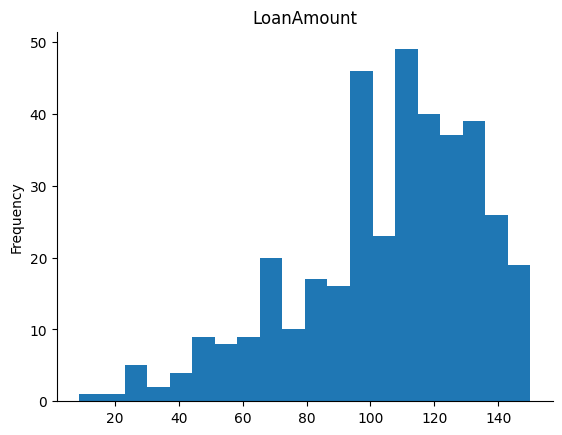

In [52]:
# lalu kita akan memvisualisasikan dari data kita
data["LoanAmount"].plot(kind='hist', bins=20, title='LoanAmount')
plt.gca().spines[['top', 'right',]].set_visible(False) # ini fungsinya untuk menonaktifkan border di atas dan kanan

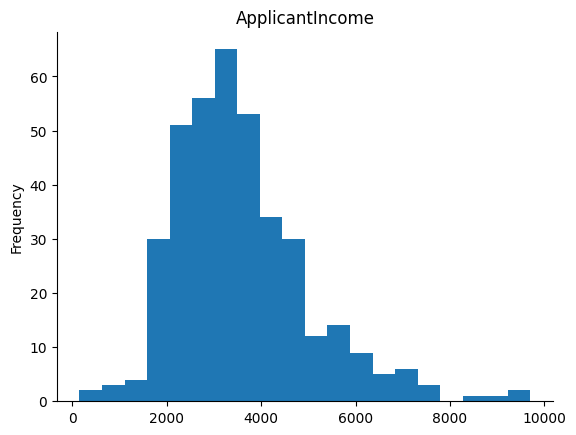

In [53]:
# visualisasikan dengan atribut lainnya
data['ApplicantIncome'].plot(kind='hist', bins=20, title="ApplicantIncome")
plt.gca().spines[['top', 'right',]].set_visible(False) # untuk ini untuk menghilangkan 

In [54]:
# fungsinya untuk mengubah data x menjadi array
X = data.values
X[:5]

array([[4583,  128],
       [3000,   66],
       [2583,  120],
       [6000,  141],
       [2333,   95]], dtype=int64)

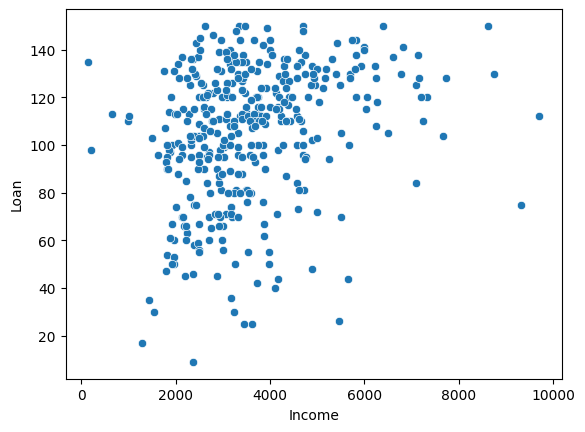

In [55]:
df = pd.DataFrame(X, columns=['Income', 'Loan']) # tentukan dataframe yang ingin divisualisasikan
sns.scatterplot(data=df, x='Income', y='Loan') # kita gunakan scatterplot untuk menampilkan datanya
plt.xlabel('Income') # label vertikal
plt.ylabel('Loan') # label horizontal
plt.show()

In [56]:
# untuk menghitung inertia atau jumlah error data
def calculate_cost(X, centroids, cluster):
    sum = 0
    for i, val in enumerate(X):
        sum += np.sqrt((centroids[int(cluster[i]), 0]-val[0])**2 +(centroids[int(cluster[i]), 1]-val[1])**2)
        # kita akan menghitung untuk setiap setiap error item dengan menghitung jarak centroid dengan member

    return sum

In [57]:
def kmeans(X, k):

    diff = 1 # untuk melakukan perhitungan perbedaan antara iterasi terakhir dengan baru
    cluster = np.zeros(X.shape[0]) # menyiapkan list cluster kosong yang dapat dimasukkan

    random_indices = np.random.choice(len(X), size=k, replace=False) # melakukan randomize untuk menentukan centroidnya
    centroids = X[random_indices, :] # memotong hasil randomnya dengan item yang ada

    # looping sampai tidak ada perbedaan iterasi -1 dengan iterasi -2
    while diff:
        # kita lakuakan peloopingan mencari cluster / menentukan cluster
        for i, row in enumerate(X): 
            mn_dist = float('inf')
            # looping untuk menghitung distancenya dg euclidean
            for idx, centroid in enumerate(centroids):
                d = np.sqrt((centroid[0]-row[0])**2 + (centroid[1]-row[1])**2)

                if mn_dist > d:
                    mn_dist = d
                    cluster[i] = idx

        # menentukan centroid yang baru
        new_centroids = pd.DataFrame(X).groupby(by=cluster).mean().values

        # jika hasil dari perbedaan iterasi -1 dengan iterasi -2 maka jadikan diff nya 0
        if np.count_nonzero(centroids-new_centroids) == 0:
            diff = 0
        else:
            centroids = new_centroids # perbarui centroidnya
        return centroids, cluster

In [58]:
cost_list = []

# kita akan mencoba mengumpulkan semua error dengan parameter k yang berbeda beda
for k in range(1, 10):
    centroids, cluster = kmeans(X, k) # proses training

    cost = calculate_cost(X, centroids, cluster) # hitung error nya
    cost_list.append(cost)

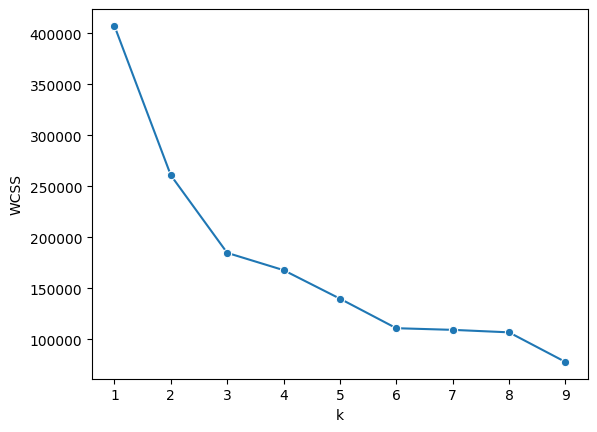

In [59]:
# kita siapkan plotting untuk menampilkan hasil graphics lalu analisa dengan teknik elbow analyst
sns.lineplot(x=range(1, 10), y=cost_list, marker='o') 
plt.xlabel('k')
plt.ylabel("WCSS")
plt.show()

In [60]:
k = 4 # kita tentukan untuk jumlah kluster yang cocok
centroids, cluster = kmeans(X, k) # kita training modelnya

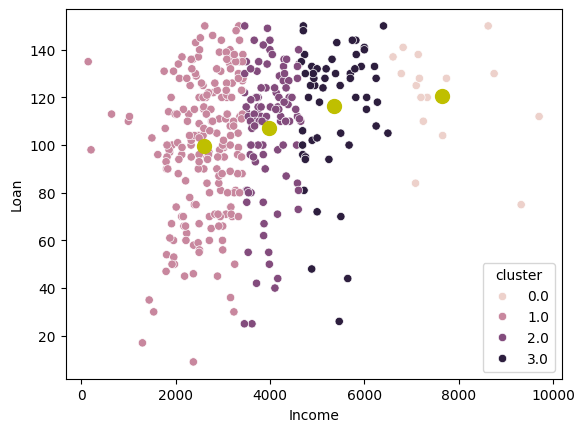

In [61]:
df = pd.DataFrame(X, columns=['Income', 'Loan']) # menyiapkan dataframe
df['cluster'] = cluster

# kita tampilkan untuk hasil scatter beserta dengan label dan centroidnya
sns.scatterplot(data=df, x='Income', y='Loan', hue='cluster')
plt.scatter(centroids[:, 0], centroids[:, 1], s=100, color='y')
plt.xlabel('Income')
plt.ylabel('Loan')
plt.show()